In [1]:
# This notebook is based on the course offered on Udemy
# https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery/

In [2]:
# Unzip the downloaded file 
import zipfile

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os 

#walk through the pizza steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} images in '{dirpath}'.")

There are 2 images in 'pizza_steak'.
There are 2 images in 'pizza_steak\test'.
There are 0 images in 'pizza_steak\test\pizza'.
There are 0 images in 'pizza_steak\test\steak'.
There are 2 images in 'pizza_steak\train'.
There are 0 images in 'pizza_steak\train\pizza'.
There are 0 images in 'pizza_steak\train\steak'.


In [4]:
#another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [5]:
#get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_names from the subdirectory

print(class_names)

['pizza' 'steak']


In [6]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup the target directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #read in the image, and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['799874.jpg']
Image shape: (512, 512, 3)


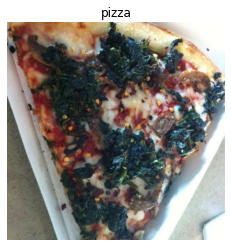

In [7]:
#
image_rand = view_random_image(target_dir = "pizza_steak/train/",
                               target_class="pizza")

In [8]:
#The images weve imported are actually giant arrays/tensors of different pixel values 
import tensorflow as tf
tf.constant(image_rand)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[168, 158, 157],
        [176, 162, 159],
        [176, 157, 150],
        ...,
        [255, 255, 251],
        [255, 255, 251],
        [255, 255, 251]],

       [[174, 164, 163],
        [178, 164, 161],
        [175, 156, 149],
        ...,
        [255, 255, 251],
        [255, 255, 251],
        [255, 255, 251]],

       [[180, 170, 169],
        [179, 165, 162],
        [174, 155, 148],
        ...,
        [255, 255, 251],
        [255, 255, 251],
        [255, 255, 251]],

       ...,

       [[137, 132, 113],
        [145, 140, 121],
        [150, 145, 126],
        ...,
        [255, 255, 251],
        [255, 255, 251],
        [255, 255, 251]],

       [[141, 134, 116],
        [143, 136, 118],
        [147, 140, 122],
        ...,
        [255, 255, 251],
        [255, 255, 251],
        [255, 255, 251]],

       [[142, 135, 117],
        [138, 131, 113],
        [141, 134, 116],
        ...,
        [255, 255, 25

In [9]:
#get all the pixel values between 0 and 1
image_rand/255.

array([[[0.65882353, 0.61960784, 0.61568627],
        [0.69019608, 0.63529412, 0.62352941],
        [0.69019608, 0.61568627, 0.58823529],
        ...,
        [1.        , 1.        , 0.98431373],
        [1.        , 1.        , 0.98431373],
        [1.        , 1.        , 0.98431373]],

       [[0.68235294, 0.64313725, 0.63921569],
        [0.69803922, 0.64313725, 0.63137255],
        [0.68627451, 0.61176471, 0.58431373],
        ...,
        [1.        , 1.        , 0.98431373],
        [1.        , 1.        , 0.98431373],
        [1.        , 1.        , 0.98431373]],

       [[0.70588235, 0.66666667, 0.6627451 ],
        [0.70196078, 0.64705882, 0.63529412],
        [0.68235294, 0.60784314, 0.58039216],
        ...,
        [1.        , 1.        , 0.98431373],
        [1.        , 1.        , 0.98431373],
        [1.        , 1.        , 0.98431373]],

       ...,

       [[0.5372549 , 0.51764706, 0.44313725],
        [0.56862745, 0.54901961, 0.4745098 ],
        [0.58823529, 0

## End to end example

Convolutional Neural network to find patterns in our images, more specifically we need way to

* load our images
* preprocess our images
* build a CNN to find patterns in our images
* Compile our CNN 
* Fit the CNN to our training data

In [10]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set random seed
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our directories
train_dir = "C:\\Users\\alexc\\ML Learning\\Neural-Network-Practice\\pizza_steak\\train" 
test_dir = "C:\\Users\\alexc\\ML Learning\\Neural-Network-Practice\\pizza_steak\\test" 

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

#Build a CNN model (same as the Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), #This layers is the same as the one above
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile our CNN
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 36s 732ms/step - loss: 0.6351 - accuracy: 0.6293 - val_loss: 0.4814 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 28s 591ms/step - loss: 0.4293 - accuracy: 0.8047 - val_loss: 0.3579 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 28s 592ms/step - loss: 0.3877 - accuracy: 0.8253 - val_loss: 0.4901 - val_accuracy: 0.7540
Epoch 4/5
47/47 [==============================] - 28s 595ms/step - loss: 0.3682 - accuracy: 0.8447 - val_loss: 0.3317 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 28s 589ms/step - loss: 0.3541 - accuracy: 0.8493 - val_loss: 0.3248 - val_accuracy: 0.8740


In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using another model to try to fit the data

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is going to be from the tensorflow website

In [12]:
#set random seed 
tf.random.set_seed(42)

#create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#fit the model
history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 285ms/step - loss: 1.0458 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 13s 286ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 13s 284ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 13s 278ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 13s 282ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [14]:
#set random seed 
tf.random.set_seed(42)

#same model as model_2, but adding more neurons per layer, and an extra layer
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#fit the model
history_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 314ms/step - loss: 2.5592 - accuracy: 0.6307 - val_loss: 0.5917 - val_accuracy: 0.6700
Epoch 2/5
47/47 [==============================] - 15s 309ms/step - loss: 0.5931 - accuracy: 0.7367 - val_loss: 0.6530 - val_accuracy: 0.6600
Epoch 3/5
47/47 [==============================] - 14s 307ms/step - loss: 0.7979 - accuracy: 0.6833 - val_loss: 0.7293 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 14s 305ms/step - loss: 0.5356 - accuracy: 0.7807 - val_loss: 0.5013 - val_accuracy: 0.7480
Epoch 5/5
47/47 [==============================] - 15s 309ms/step - loss: 0.5369 - accuracy: 0.7667 - val_loss: 0.4816 - val_accuracy: 0.7660


In [15]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Break down Binary Classification

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evakuate the model
6. Adjust different parameters and improve the model (try to beat the baseline)
7. Repeat until satsified

### Become one with the data

['440188.jpg']
Image shape: (382, 512, 3)
['1097980.jpg']
Image shape: (512, 512, 3)


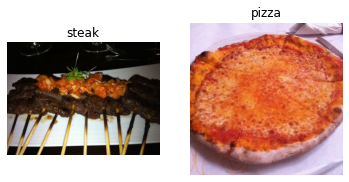

In [16]:
#visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### Preprocess the data

In [17]:
#define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

The next step is to turn the data into batches
The objective of turning data into batches is to not overload the working memory of the computer
For example, we can load 32 images into working memory at a time.
Another reason is that trying to learn the patterns of all the images at once might lead the model to learn the patterns poorly. 

Also, test batches should not exceed 32

In [18]:
#create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [19]:
#load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [20]:
#get a sample of a train data breach
images, labels = train_data.next() #get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [21]:
#Howw many batches are there? 
len(train_data)

#1500/32 = 46.875 about 47

47

In [22]:
#Make sure that the image array is preprocessed correctly
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [23]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN Model (start with a baseline)

A baseline is a relatively simple model or existing result

In [24]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [25]:
# Create a model (This will be our baseline, a layer convilutional neural network)

model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), ##input layer (specify input shape)
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") #output layer (working with binary classification so only one output neuron)
])

In [26]:
#Compile the model

model_4.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

In [27]:
#Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Fit the model
history_model_4 = model_4.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 640ms/step - loss: 1.3139 - accuracy: 0.6593 - val_loss: 0.4683 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 27s 574ms/step - loss: 0.4454 - accuracy: 0.8073 - val_loss: 0.4037 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 28s 596ms/step - loss: 0.3293 - accuracy: 0.8687 - val_loss: 0.4678 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 27s 566ms/step - loss: 0.1885 - accuracy: 0.9333 - val_loss: 0.3659 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 26s 561ms/step - loss: 0.0728 - accuracy: 0.9820 - val_loss: 0.4810 - val_accuracy: 0.7920


In [29]:
#comparing it to our first model
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

<AxesSubplot:>

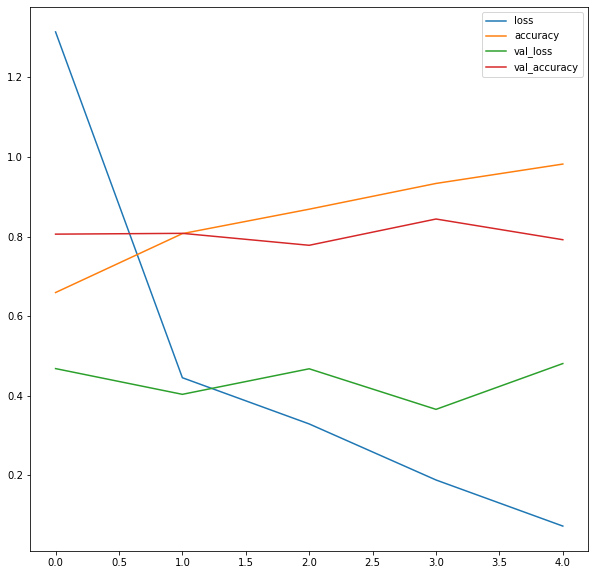

In [31]:
import pandas as pd 
pd.DataFrame(history_model_4.history).plot(figsize=(10,10))

In [36]:
def plot_loss_curves(history):
    """Returns seperate loss curves for training and validation data"""
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
    
    #plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    #plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

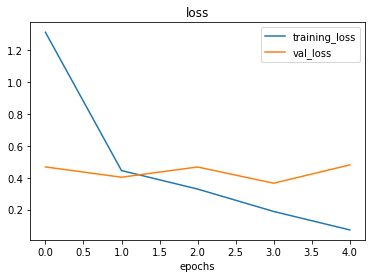

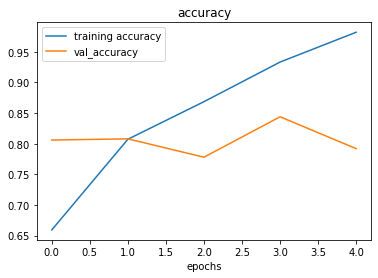

In [37]:
plot_loss_curves(history_model_4)

Our previous model seems to have a flat curve for validation, while an increasing curve for training data. This likely means that our model is overfitting the data.

0. Basic model
1. Beat baseline, overfitting is ok
2. dial it down to reduce overfitting

In [49]:
#Because of overfitting, we are going to tune model parameters
model_5 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [50]:
#Compile the model

model_5.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

In [51]:
#Fit the model
history_model_5 = model_5.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 295ms/step - loss: 0.6103 - accuracy: 0.6500 - val_loss: 0.4277 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 15s 308ms/step - loss: 0.4455 - accuracy: 0.8013 - val_loss: 0.3792 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 14s 302ms/step - loss: 0.4096 - accuracy: 0.8160 - val_loss: 0.3387 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 15s 308ms/step - loss: 0.3762 - accuracy: 0.8407 - val_loss: 0.3271 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 15s 309ms/step - loss: 0.3212 - accuracy: 0.8707 - val_loss: 0.3347 - val_accuracy: 0.8520


In [52]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
flatten_6 (Flatten)          (None, 27040)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

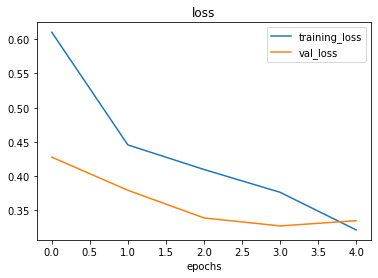

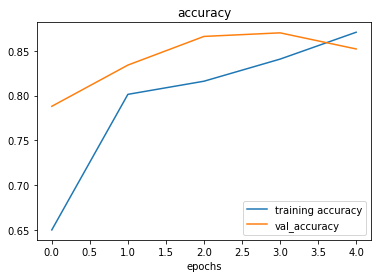

In [54]:
plot_loss_curves(history_model_5)
#wow!! Much better!
#The maxpooling layers help exxagerate the important features so then the convolutional layer can focus on those features. 
#It also helps brings down the number of parameters